<a href="https://colab.research.google.com/github/r12habh/Scaler-DSML/blob/main/Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
print('Done')

Done


In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Product_Category'] = df['Product_Category'].astype('category')
df.dtypes

User_ID                          int64
Product_ID                      object
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

# Non-Graphical Analysis

* User_ID:	User ID
* Product_ID:	Product ID
* Gender:	Sex of User
* Age:	Age in bins
* Occupation:	Occupation(Masked)
* City_Category:	Category of the City (A,B,C)
* StayInCurrentCityYears:	Number of years stay in current city
* Marital_Status:	Marital Status
* ProductCategory:	Product Category (Masked)
* Purchase:	Purchase Amount

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()/len(df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

**There are no duplicate or null values in the dataset.**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

**Age group 26 to 35 has the highest number of users.**

In [ ]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

**City category B has the highest number of purchases.**

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
df['User_ID'].nunique()

5891

In [ ]:
df.groupby(['Gender'])['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

**There is 2.5 times more rows for men than women.**

In [ ]:
df.describe(include=['category']).T

,count,unique,top,freq
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


**^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^**

In [ ]:
df[['Purchase']].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
pd.crosstab(index=df['Marital_Status'], columns=df['Gender'], margins=True, normalize=True) * 100

Gender,F,M,All
Marital_Status,,,
0,14.329319,44.705382,59.034701
1,10.360174,30.605125,40.965299
All,24.689493,75.310507,100.000000


**Both unmarried men and women make more purchases than married.**

In [ ]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


**The cost of purchases made by men and women are almost same.**

# Correlation

In [ ]:
pd.crosstab(index=df['Age'], columns=df['Stay_In_Current_City_Years'], margins=True, normalize=True) * 100

Stay_In_Current_City_Years,0,1,2,3,4+,All
Age,,,,,,
0-17,0.401769,0.895344,0.645375,0.502665,0.300327,2.745479
18-25,3.014536,5.874910,3.499749,2.798381,2.930183,18.117760
26-35,5.037377,14.083531,7.245286,7.176931,6.376848,39.919974
36-45,2.529505,6.739894,3.827890,4.179847,2.722754,19.999891
46-50,1.216759,3.256325,1.440004,1.090047,1.305111,8.308246
51-55,0.796265,3.084346,1.109681,0.913160,1.095865,6.999316
55+,0.529026,1.301475,0.745726,0.661373,0.671735,3.909335
All,13.525237,35.235825,18.513711,17.322404,15.402823,100.000000


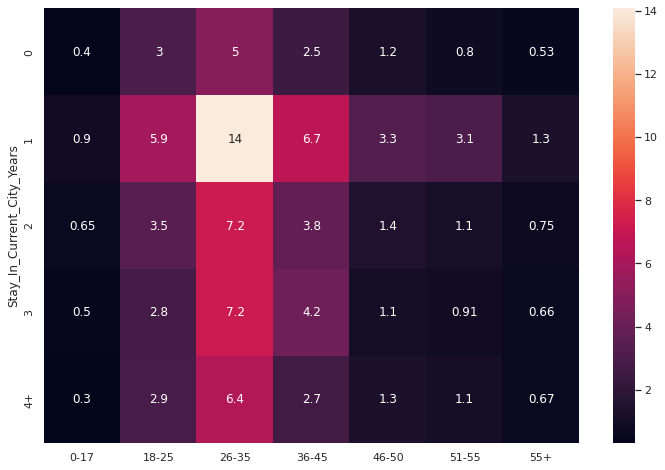

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.groupby(['Stay_In_Current_City_Years'])['Age'].value_counts().unstack()/len(df) * 100, annot=True)

**People living in a city for about 1 year and in the age range around 26-35 have the most purchases. As seen in the heatmap there is kind of a heat source at (26-35, 1).**

**The major user base of Walmart seems like in the age range of 18 to 45.**

# Continuous Variable: Purchase

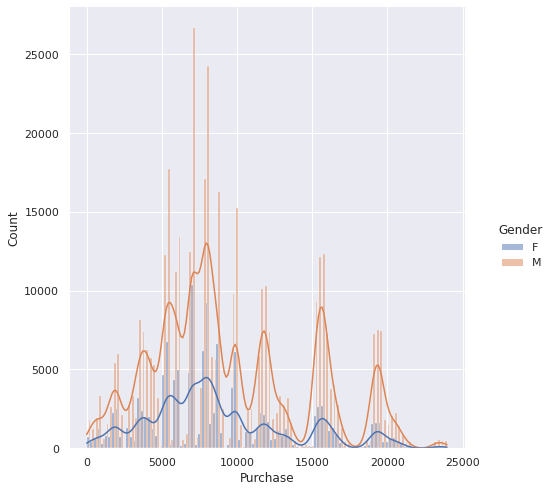

In [ ]:
sns.displot(data=df, x='Purchase', kde=True, hue='Gender', height=7, multiple="dodge", bins=100)

**Most of the purchases made are in the range 5,000 to 10,000.**

**According to the above plot, both men and women have similar spending habbit and no, women aren't spending more money per transaction**

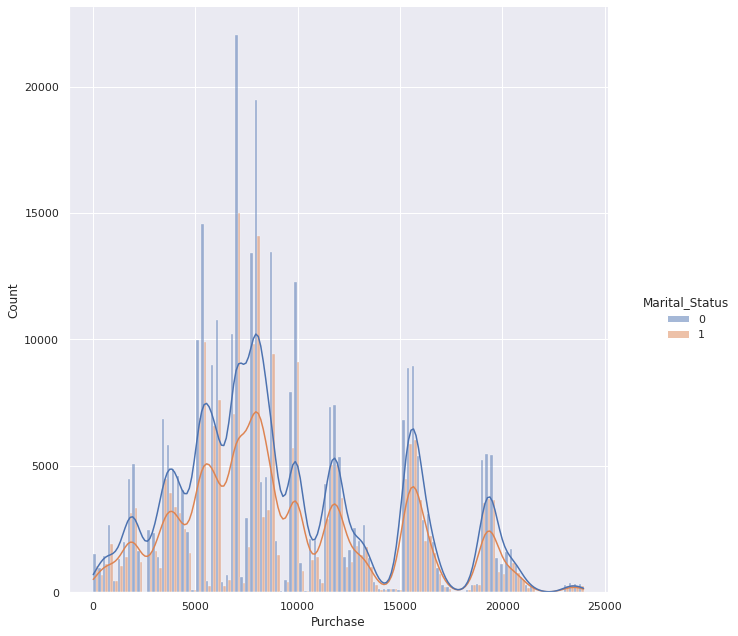

In [ ]:
sns.displot(data=df, x='Purchase', kde=True, hue='Marital_Status', height=9, multiple="dodge", bins=100)

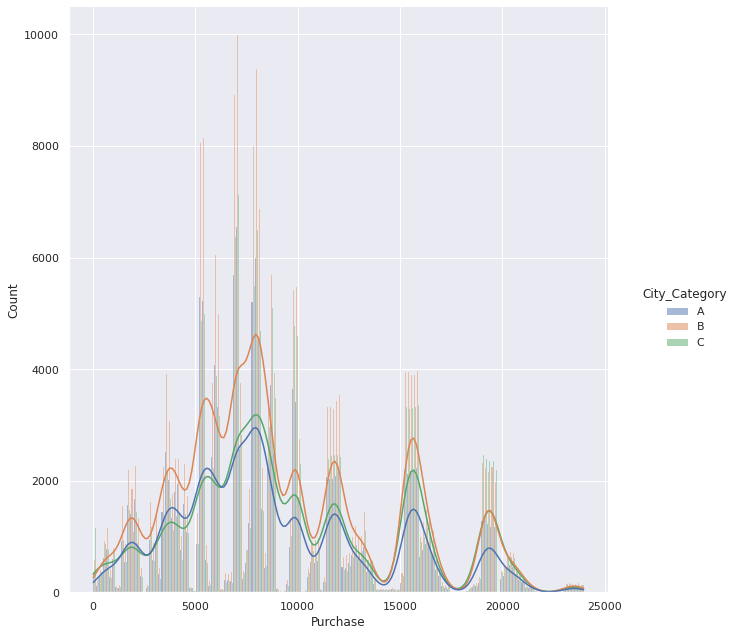

In [ ]:
sns.displot(data=df, x='Purchase', kde=True, hue='City_Category', height=9, multiple="dodge")

**Spendings in city category A is more than B, and in B its slightly more than C.**

**From the above 3 plots its clear that there are very few purchases over 20,000 on Walmart.**

# Feature Engineering: Total Purchase

In [ ]:
df[df['User_ID']==1006038]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
155550,1006038,P00034742,F,55+,1,C,2,0,5,6878
194537,1006038,P00251242,F,55+,1,C,2,0,5,5382
233704,1006038,P00086042,F,55+,1,C,2,0,8,5958
311691,1006038,P00109542,F,55+,1,C,2,0,8,9696
428873,1006038,P00113442,F,55+,1,C,2,0,3,13565
467646,1006038,P00106742,F,55+,1,C,2,0,3,13429
467647,1006038,P00125742,F,55+,1,C,2,0,8,6039
506583,1006038,P00196642,F,55+,1,C,2,0,8,7815
506584,1006038,P00118542,F,55+,1,C,2,0,5,5184
506585,1006038,P00331542,F,55+,1,C,2,0,5,6913


In [ ]:
df1 = pd.DataFrame(df.groupby(['User_ID'], as_index=False)['Purchase'].sum())
df1.head()

,User_ID,Purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000004,206468
4,1000005,821001


In [ ]:
df2 = df[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']].drop_duplicates(subset=['User_ID']).set_index('User_ID')
df2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
User_ID,,,,,,
1000001,F,0-17,10,A,2,0
1000002,M,55+,16,C,4+,0
1000003,M,26-35,15,A,3,0
1000004,M,46-50,7,B,2,1
1000005,M,26-35,20,A,1,1


In [ ]:
df1 = pd.DataFrame(df.groupby(['User_ID'], as_index=False)['Purchase'].sum()).set_index('User_ID')
df1 = pd.concat(
      [df1, df2], 
      axis=1,
      join='inner'
      )
df1.rename(columns={'Purchase': 'Total_Purchase'}, inplace=True)
df1.head()

,Total_Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
User_ID,,,,,,,
1000001,334093,F,0-17,10,A,2,0
1000002,810472,M,55+,16,C,4+,0
1000003,341635,M,26-35,15,A,3,0
1000004,206468,M,46-50,7,B,2,1
1000005,821001,M,26-35,20,A,1,1


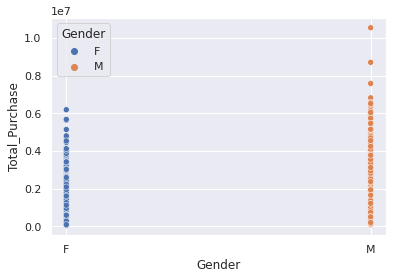

In [ ]:
sns.scatterplot(x='Gender', y='Total_Purchase', hue='Gender', data=df1)

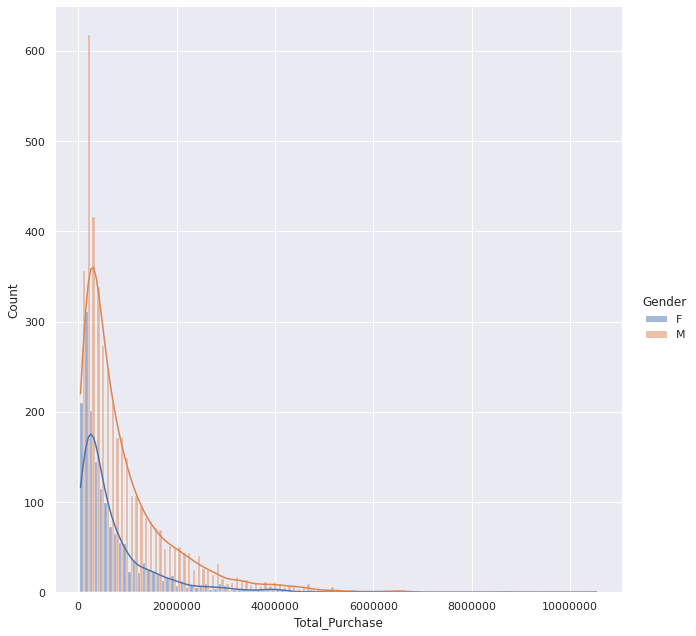

In [ ]:
sns.displot(data=df1, x='Total_Purchase', hue='Gender', multiple='dodge', kde=True, height=9)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

**Again the above pattern shows that the total purchase made by both men and women are similar.**

## Purchase: Outliers

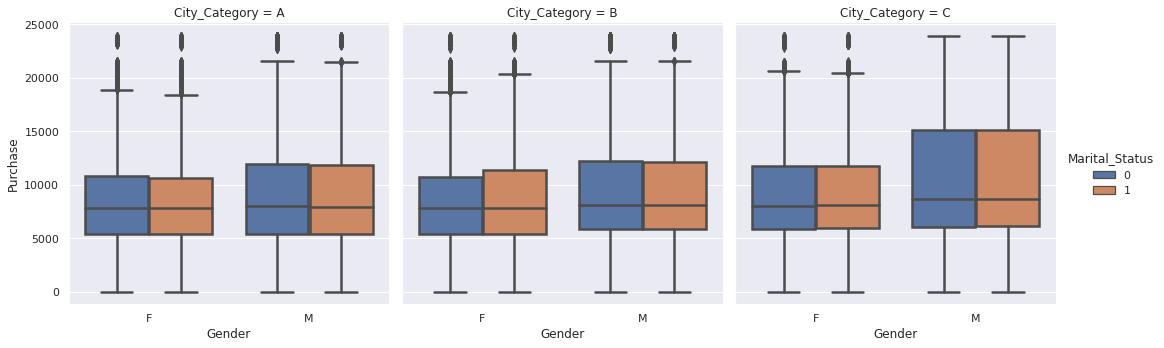

In [ ]:
sns.catplot(x='Gender', y='Purchase', hue='Marital_Status', col='City_Category', data=df, 
            linewidth=2.5, kind='box')

In [ ]:
q1 = df['Purchase'].quantile(.25)
q3 = df['Purchase'].quantile(.75)

iqr = q3 - q1

purchase_df = df[(df['Purchase'] > q1-1.5*iqr) & (df['Purchase'] < q3+1.5*iqr)]
purchase_df[['Gender', 'Purchase']].groupby('Gender').describe()

Purchase                                                           \
           count         mean          std   min     25%     50%      75%   
Gender                                                                      
F       135220.0  8671.049039  4679.058483  12.0  5429.0  7906.0  11064.0   
M       412171.0  9367.724355  5009.234088  12.0  5852.0  8089.0  12247.0   

                 
            max  
Gender           
F       21398.0  
M       21399.0

In [ ]:
1.5*iqr+q3, q1-1.5*iqr

(21400.5, -3523.5)

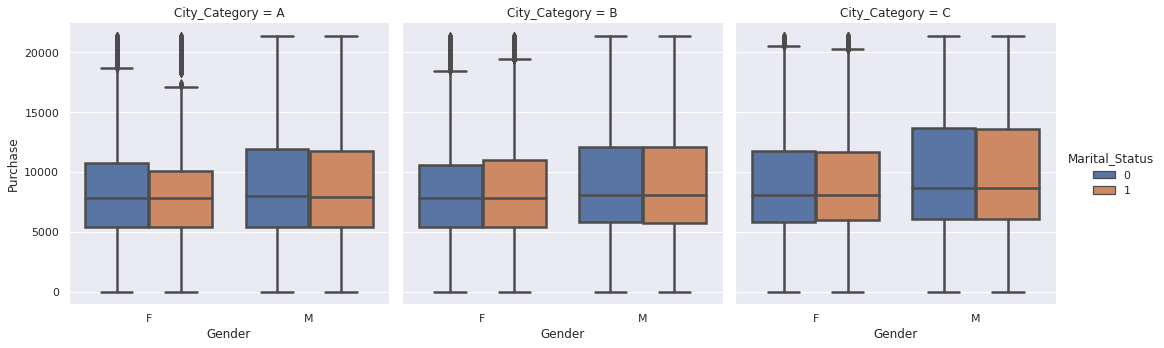

In [ ]:
sns.catplot(x='Gender', y='Purchase', hue='Marital_Status', col='City_Category', data=purchase_df, 
            linewidth=2.5, kind='box')

## Total Purchase: Outliers

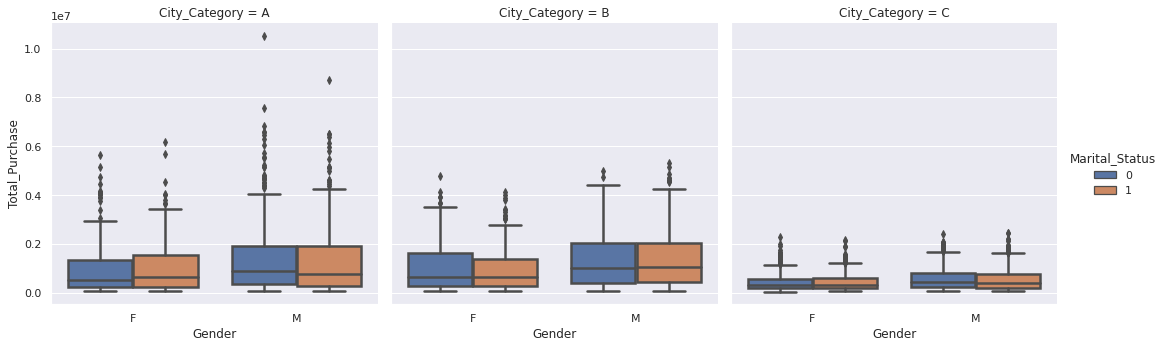

In [ ]:
sns.catplot(x='Gender', y='Total_Purchase', hue='Marital_Status', col='City_Category', data=df1, 
            linewidth=2.5, kind='box')

In [ ]:
q1 = df1['Total_Purchase'].quantile(.25)
q3 = df1['Total_Purchase'].quantile(.75)

iqr = q3 - q1

total_purchase_df = df1[(df1['Total_Purchase'] > q1-1.5*iqr) & (df1['Total_Purchase'] < q3+1.5*iqr)]
total_purchase_df[['Gender', 'Total_Purchase']].groupby('Gender').describe()

Total_Purchase                                                    \
                count           mean            std      min        25%   
Gender                                                                    
F              1584.0  573484.713384  512895.998755  46681.0  196487.50   
M              3898.0  706099.355823  578827.818730  49288.0  241576.75   

                                        
             50%        75%        max  
Gender                                  
F       379895.5  784817.75  2439560.0  
M       513360.0  999309.75  2440164.0

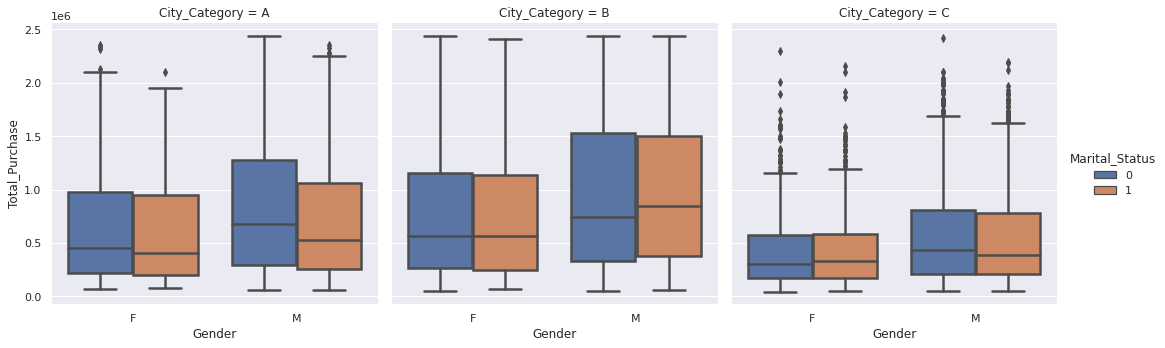

In [ ]:
sns.catplot(x='Gender', y='Total_Purchase', hue='Marital_Status', col='City_Category', data=total_purchase_df, 
            linewidth=2.5, kind='box')

**After removing outliers it seems like City Category B has higher valued total purchases compared to City Category A.**

In [ ]:
1.5*iqr+q3, q1-1.5*iqr

(2441606.75, -1084679.25)

# New section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

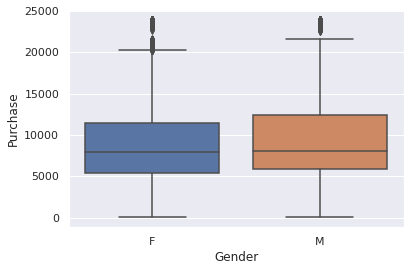

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=df)

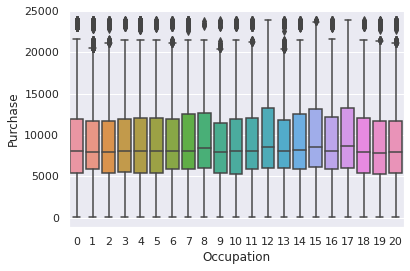

In [ ]:
sns.boxplot(x='Occupation', y='Purchase', data=df)

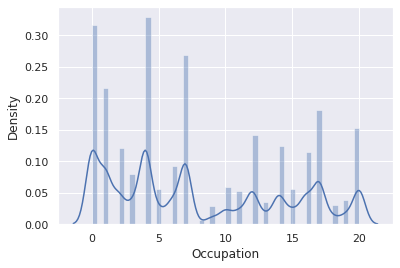

In [ ]:
sns.distplot(df['Occupation'], kde=True)

# CLT

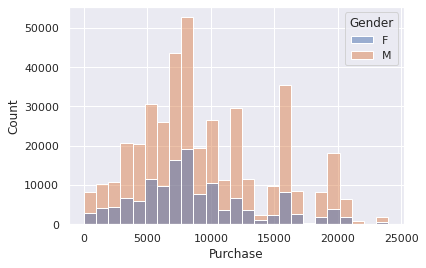

In [ ]:
sns.histplot(x='Purchase', hue='Gender', data=df, bins=25)

In [ ]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
df.sample(300).groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,74.0,8044.297297,4540.998791,958.0,5311.75,7457.5,10012.50,22678.0
M,226.0,9459.252212,5248.388280,359.0,5461.25,8108.5,13339.75,23229.0


## Male Sampling

In [ ]:
df[df['Gender']=='M']['Purchase'].sample(300).mean()

9058.5

In [ ]:
male_expense_mean = [df[df['Gender']=='M']['Purchase'].sample(300).mean() for i in range(1000)]

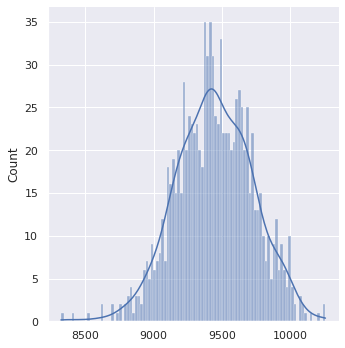

In [ ]:
sns.displot(male_expense_mean, bins=100, kde=True)

In [ ]:
pd.Series(male_expense_mean).mean()

9445.289733333328

In [ ]:
pd.Series(male_expense_mean).std()

280.3424799827896

In [ ]:
lower_limit_males = pd.Series(male_expense_mean).mean() - (pd.Series(male_expense_mean).std()/np.sqrt(1000))*1.96
lower_limit_males

9427.91392640507

In [ ]:
upper_limit_males = pd.Series(male_expense_mean).mean() + (pd.Series(male_expense_mean).std()/np.sqrt(1000))*1.96
upper_limit_males

9462.665540261585

In [ ]:
(lower_limit_males, upper_limit_males)

(9427.91392640507, 9462.665540261585)

In [ ]:
lower_limit_males = pd.Series(male_expense_mean).mean() - (df[df['Gender']=='M']['Purchase'].std()/np.sqrt(1000))*1.96
lower_limit_males

9129.672762158401

## Female Purchase Sampling

In [ ]:
female_expense_mean = [df[df['Gender']=='F']['Purchase'].sample(300).mean() for i in range(1000)]

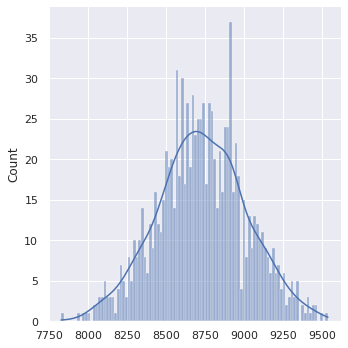

In [ ]:
sns.displot(female_expense_mean, bins=100, kde=True)

In [ ]:
lower_limit_females = pd.Series(female_expense_mean).mean() - (pd.Series(female_expense_mean).std()/np.sqrt(1000))*1.96
lower_limit_females

8713.592170166494

In [ ]:
upper_limit_females = pd.Series(female_expense_mean).mean() + (pd.Series(female_expense_mean).std()/np.sqrt(1000))*1.96
upper_limit_females

8748.94859650019

In [ ]:
lower_limit_females, upper_limit_females

(8713.592170166494, 8748.94859650019)

**The mean of male purchases seems to be higher than female purchases.**

## Unmarried

In [ ]:
unmarried_expense_mean = [df[df['Marital_Status']==0]['Purchase'].sample(300).mean() for i in range(1000)]

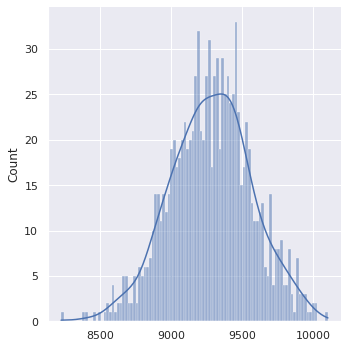

In [ ]:
sns.displot(unmarried_expense_mean, bins=100, kde=True)

In [ ]:
lower_limit_unmarried = pd.Series(unmarried_expense_mean).mean() - (pd.Series(unmarried_expense_mean).std()/np.sqrt(1000))*1.96
upper_limit_unmarried = pd.Series(unmarried_expense_mean).mean() + (pd.Series(unmarried_expense_mean).std()/np.sqrt(1000))*1.96
lower_limit_unmarried, upper_limit_unmarried

(9265.04734759054, 9301.019832409458)

## Married

In [ ]:
married_expense_mean = [df[df['Marital_Status']==1]['Purchase'].sample(300).mean() for i in range(1000)]

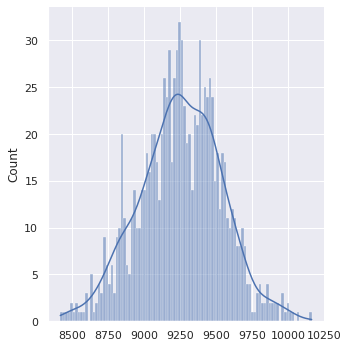

In [ ]:
sns.displot(married_expense_mean, bins=100, kde=True)

In [ ]:
lower_limit_married = pd.Series(married_expense_mean).mean() - (pd.Series(married_expense_mean).std()/np.sqrt(1000))*1.96
upper_limit_married = pd.Series(married_expense_mean).mean() + (pd.Series(married_expense_mean).std()/np.sqrt(1000))*1.96
lower_limit_married, upper_limit_married

(9236.828916511995, 9272.225930154646)

**The mean of purchases done by both married people and unmarried people seems to be close, not much difference.**

# Recommendations:
1. Walmart can put in extra efforts to cater to users in the age group 18-25 and 36-45, as they are the second-highest shoppers.
2. Walmart needs to target women through women-specific product categories as they are shopping lesser than men on the platform.